In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
from sklearn.metrics import roc_auc_score, roc_curve

from graphviz import Source 
from sklearn.tree import export_graphviz

from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### 데이터 준비

In [2]:
df = pd.read_csv('final_df.csv')
df

,signup_duration,subscription_duration,content_view,recommended_view,watched_duration,bookmark_count,like_count,dislike_count,rating_count,chrun_19-06,...,login_method_Password,login_method_Social_Login,payment_method_Credit_Card,payment_method_Gift_Card,payment_method_PayPal,category_Animation,category_Documentary,category_Drama,category_Movie,category_Unwatched
0,19.0,18.0,105.0,30.0,109.400556,3.0,0.0,2.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,17.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,30.0,29.0,124.0,23.0,122.255000,2.0,3.0,3.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,40.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,36.0,36.0,74.0,16.0,65.516111,1.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5438,50.0,50.0,108.0,21.0,109.924167,2.0,4.0,5.0,3.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5439,57.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5440,23.0,22.0,125.0,19.0,130.656944,9.0,3.0,5.0,4.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5441,13.0,13.0,185.0,38.0,172.525000,2.0,6.0,4.0,5.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
df.describe()

,signup_duration,subscription_duration,content_view,recommended_view,watched_duration,bookmark_count,like_count,dislike_count,rating_count,chrun_19-06,...,login_method_Password,login_method_Social_Login,payment_method_Credit_Card,payment_method_Gift_Card,payment_method_PayPal,category_Animation,category_Documentary,category_Drama,category_Movie,category_Unwatched
count,5443.000000,5443.000000,5443.00000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,...,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000
mean,35.378835,18.190336,55.52618,11.097189,57.790934,1.979239,2.008267,2.027742,2.026823,0.500092,...,0.550799,0.449201,0.332721,0.334926,0.332353,0.095536,0.227632,0.088554,0.100129,0.488150
std,19.871522,22.072468,58.34205,12.027131,60.894050,2.748046,2.790446,2.798672,2.803568,0.500046,...,0.497458,0.497458,0.471231,0.472008,0.471100,0.293980,0.419342,0.284125,0.300199,0.499905
min,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,1.000000,50.00000,8.000000,51.821389,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,53.000000,36.000000,109.00000,21.000000,113.449167,4.000000,4.000000,4.000000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,69.000000,69.000000,229.00000,55.000000,249.994167,16.000000,15.000000,15.000000,18.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- signup_duration : 값과 평균 사이 차이가 큼
- subscription_duration : 이상치가 있어 표준편차가 큼
- content_view : 값 사이의 편차가 큼
- recommended_View : 값 사이의 편차가 큼
- watched_duration : 값 사이의 편차가 큼 
- like_count : 값 사이의 편차가 크며 이상치가 있음
- dislike_count : 값 사이의 편차가 크며 이상치가 있음
- rating_count : 값 사이의 편차가 크며 이상치가 있음

In [4]:
X = df.drop('churn', axis=1)
y = df['churn']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [6]:
columns = ['signup_duration', 'subscription_duration', 'content_view', 'recommended_view', 
                    'watched_duration', 'bookmark_count', 'like_count', 'dislike_count', 'rating_count']

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_train_scaled[columns] = scaler.fit_transform(X_train[columns])

X_test_scaled = X_test.copy()
X_test_scaled[columns] = scaler.transform(X_test[columns])

In [7]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(4354, 29)
(1089, 29)


### 모델링

In [8]:
def get_clf_eval(y_test,pred):
    accuracy = accuracy_score(y_test,pred)
    recall = recall_score(y_test,pred)
    precision = precision_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc = roc_auc_score(y_test,pred)
    return accuracy, recall, precision, f1, roc

def print_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy, recall, precision, f1, roc = get_clf_eval(y_test, pred)
    
    print('confusion matrix')
    print(confusion)
    print('-----------------------------------------------')
    print("정확도: {0:.4f}. 재현율: {1:.4f}, 정밀도: {2:.4f}".format(accuracy, recall, precision))
    print("F1-Score: {0:.4f}. AUC: {1:.4f}".format(f1, roc))

In [9]:
# Decision Tree
dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf.fit(X_train_scaled, y_train)

dt_pred_train = dt_clf.predict(X_train_scaled)
dt_pred_test = dt_clf.predict(X_test_scaled)

print_clf_eval(y_test, dt_pred_test)

confusion matrix
[[356  78]
 [ 49 606]]
-----------------------------------------------
정확도: 0.8834. 재현율: 0.9252, 정밀도: 0.8860
F1-Score: 0.9052. AUC: 0.8727


In [10]:
# Logistic Regression
lr_clf = LogisticRegression(random_state=1)
lr_clf.fit(X_train_scaled, y_train)

lr_pred_train = lr_clf.predict(X_train_scaled)
lr_pred_test = lr_clf.predict(X_test_scaled)

print_clf_eval(y_test, lr_pred_test)

confusion matrix
[[434   0]
 [103 552]]
-----------------------------------------------
정확도: 0.9054. 재현율: 0.8427, 정밀도: 1.0000
F1-Score: 0.9147. AUC: 0.9214


In [11]:
# Neural Network
mlp_clf = MLPClassifier(hidden_layer_sizes=(8,8), max_iter=300)
mlp_clf.fit(X_train_scaled, y_train)

mlp_pred_train = mlp_clf.predict(X_train_scaled)
mlp_pred_test = mlp_clf.predict(X_test_scaled)

print_clf_eval(y_test, mlp_pred_test)

confusion matrix
[[421  13]
 [ 87 568]]
-----------------------------------------------
정확도: 0.9082. 재현율: 0.8672, 정밀도: 0.9776
F1-Score: 0.9191. AUC: 0.9186


In [12]:
# Ensembel-Voting 
lr_clf = LogisticRegression(random_state=1)
knn_clf = KNeighborsClassifier(n_neighbors=8)
dt_clf = DecisionTreeClassifier(random_state=1)

vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf), ('DT', dt_clf)] , voting='soft') 
vo_clf.fit(X_train_scaled , y_train)

vo_pred_train = vo_clf.predict(X_train_scaled)
vo_pred_test = vo_clf.predict(X_test_scaled)

print_clf_eval(y_test, vo_pred_test)

confusion matrix
[[403  31]
 [ 81 574]]
-----------------------------------------------
정확도: 0.8972. 재현율: 0.8763, 정밀도: 0.9488
F1-Score: 0.9111. AUC: 0.9025


In [13]:
# Ensembel-Random Forest(Bagging) 
rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(X_train_scaled, y_train)

rf_pred_train = rf_clf.predict(X_train_scaled)
rf_pred_test = rf_clf.predict(X_test_scaled)

print_clf_eval(y_test, rf_pred_test)

confusion matrix
[[434   0]
 [102 553]]
-----------------------------------------------
정확도: 0.9063. 재현율: 0.8443, 정밀도: 1.0000
F1-Score: 0.9156. AUC: 0.9221


In [14]:
# Ensembel-LightGBM(Boosting) 
lgbm_clf = LGBMClassifier(random_state=1)
lgbm_clf.fit(X_train_scaled, y_train)

lgbm_pred_train = lgbm_clf.predict(X_train_scaled)
lgbm_pred_test = lgbm_clf.predict(X_test_scaled)

print()
print_clf_eval(y_test, lgbm_pred_test)

[LightGBM] [Info] Number of positive: 2617, number of negative: 1737
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 693
[LightGBM] [Info] Number of data points in the train set: 4354, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.601056 -> initscore=0.409869
[LightGBM] [Info] Start training from score 0.409869

confusion matrix
[[434   0]
 [ 70 585]]
-----------------------------------------------
정확도: 0.9357. 재현율: 0.8931, 정밀도: 1.0000
F1-Score: 0.9435. AUC: 0.9466


### 성능 비교

In [15]:
accs = []

preds = {"Decision Tree": {"train": dt_pred_train, "test": dt_pred_test},
        "Logistic Regression": {"train": lr_pred_train, "test": lr_pred_test},
        "Nerual Network": {"train": mlp_pred_train, "test": mlp_pred_test},
        "Voting": {"train": vo_pred_train, "test": vo_pred_test},
        "Random Forest": {"train": rf_pred_train, "test": rf_pred_test},
        "LightGBM": {"train": lgbm_pred_train, "test": lgbm_pred_test}}

for model_name, pred in preds.items():
    train_acc = accuracy_score(y_train, pred["train"])
    test_acc = accuracy_score(y_test, pred["test"])
    accs.append({"Model": model_name, "Train": train_acc, "Test": test_acc})

accs = pd.DataFrame(accs)
accs

,Model,Train,Test
0,Decision Tree,1.000000,0.883379
1,Logistic Regression,0.897336,0.905418
2,Nerual Network,0.916169,0.908173
3,Voting,0.962563,0.897153
4,Random Forest,1.000000,0.906336
5,LightGBM,0.985990,0.935721


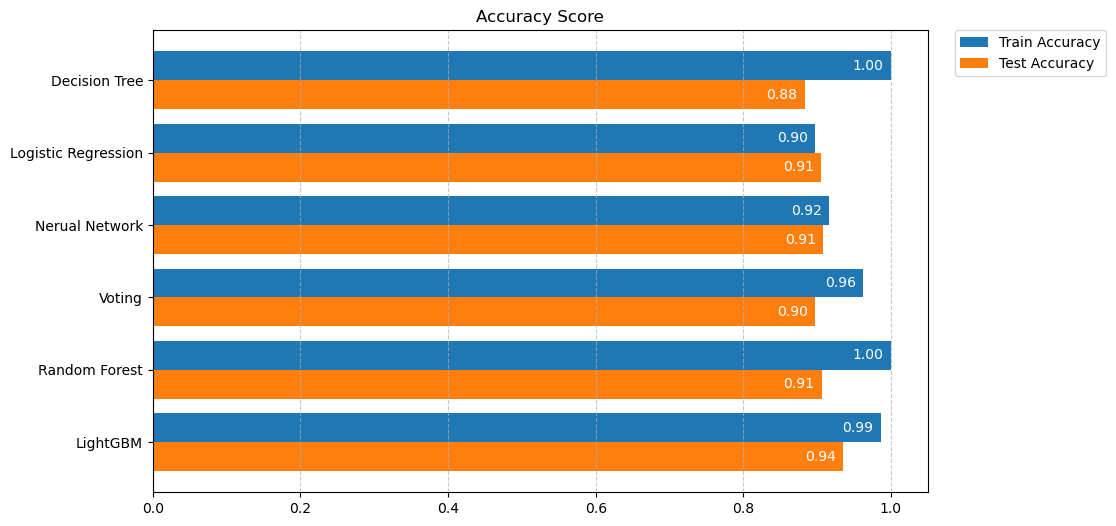

In [16]:
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = range(len(accs["Model"]))
reverse_index = list(reversed(index))

train_bar = plt.barh([i + bar_width / 2 for i in reverse_index], accs["Train"], height=bar_width, label="Train Accuracy")
test_bar = plt.barh([i - bar_width / 2 for i in reverse_index], accs["Test"], height=bar_width, label="Test Accuracy")

for bar in train_bar:
    plt.text(bar.get_width()-0.01, bar.get_y() + bar.get_height() / 2, 
        f"{bar.get_width():.2f}", va="center", ha="right", color='white')

for bar in test_bar:
    plt.text(bar.get_width()-0.01, bar.get_y() + bar.get_height() / 2, 
        f"{bar.get_width():.2f}", va="center", ha="right", color='white')

plt.yticks(reverse_index, accs["Model"])
plt.legend(bbox_to_anchor=(1.23,1), borderaxespad=0)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.title('Accuracy Score')
plt.show()

In [17]:
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    return get_clf_eval(y_test, pred)

def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['Accuracy', 'Recall', 'Precision', 'F1', 'ROC']
    metric = []

    for model in models:
        metric.append(get_result(model, X_train, y_train, X_test, y_test))

    return pd.DataFrame(metric, columns=col_names, index=model_names)

In [18]:
models = [dt_clf, lr_clf, mlp_clf, vo_clf, rf_clf, lgbm_clf]
model_names = ['Decision Tree','Logistic Regression','Nerual Network','Voting','Random Forest','LightGBM']

metrics = get_result_pd(models, model_names, X_train_scaled, y_train, X_test_scaled, y_test)
metrics

[LightGBM] [Info] Number of positive: 2617, number of negative: 1737
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000507 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 693
[LightGBM] [Info] Number of data points in the train set: 4354, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.601056 -> initscore=0.409869
[LightGBM] [Info] Start training from score 0.409869


,Accuracy,Recall,Precision,F1,ROC
Decision Tree,0.883379,0.925191,0.885965,0.905153,0.872734
Logistic Regression,0.905418,0.842748,1.000000,0.914664,0.921374
Nerual Network,0.908173,0.861069,0.984293,0.918567,0.920166
Voting,0.897153,0.876336,0.948760,0.911111,0.902454
Random Forest,0.906336,0.844275,1.000000,0.915563,0.922137
LightGBM,0.935721,0.893130,1.000000,0.943548,0.946565


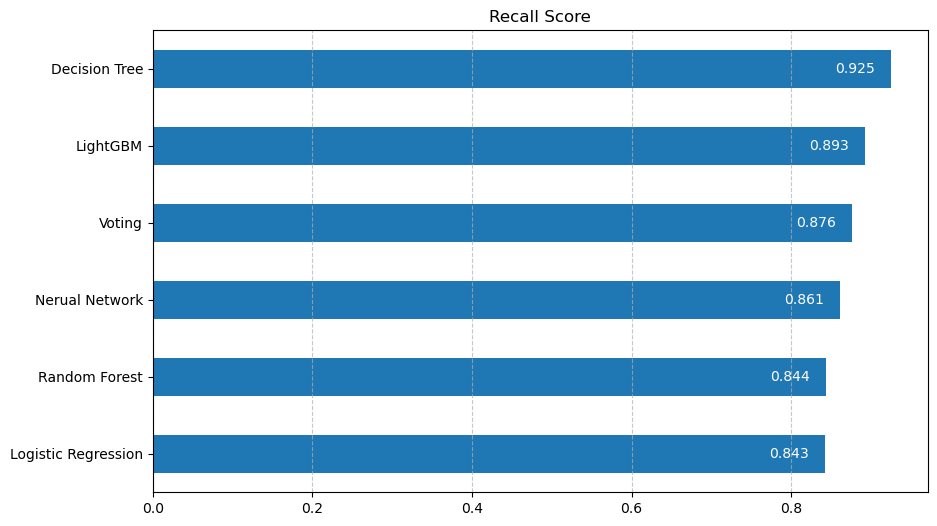

In [19]:
plt.figure(figsize=(10, 6))
sorted_recall = metrics['Recall'].sort_values(ascending=True)
sorted_recall.plot(kind='barh', title='Recall Score')

for index, value in enumerate(sorted_recall):
    plt.text(value - 0.07, index, f'{value:.3f}', va='center', color='white')

plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

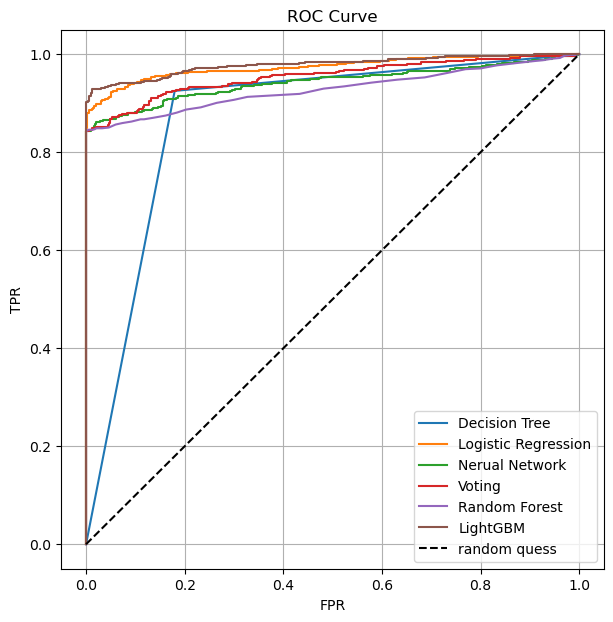

In [20]:
def draw_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize=(7,7))
    
    for model in range(len(models)):
        pred = models[model].predict_proba(X_test)[:,1]
        fall_out, recall, thresholds = roc_curve(y_test, pred)
        plt.plot(fall_out, recall, label=model_names[model])

    plt.plot([0,1], [0,1], 'k--', label='random quess')
    plt.title('ROC Curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    
    plt.legend()
    plt.grid()
    plt.show()

draw_roc_curve(models, model_names, X_test_scaled, y_test)

- 고객 이탈 예측 시, 이탈 예정 고객(FN)을 놓치지 않는 것이 중요하므로 재현율(Recall)을 주목해서 봐야 한다.
- 정확도는 LightGBM, 랜덤 포레스트, 로지스틱 회귀 순으로 높았으나, 재현율은 의사결정나무, LightGBM, Voting 순으로 나타났다.
- 의사결정나무는 성능이 좋더라도 과적합 우려가 있어 선택을 지양하고자 한다.

### 이탈 요인 분석

In [21]:
lgbm_imp_values = lgbm_clf.feature_importances_ 
lgbm_imp = pd.Series(lgbm_imp_values, index=X.columns)
lgbm_imp_top20 = lgbm_imp.sort_values(ascending=False)[:20]

rf_imp_values = rf_clf.feature_importances_ 
rf_imp = pd.Series(rf_imp_values, index=X.columns)
rf_imp_top20 = rf_imp.sort_values(ascending=False)[:20]

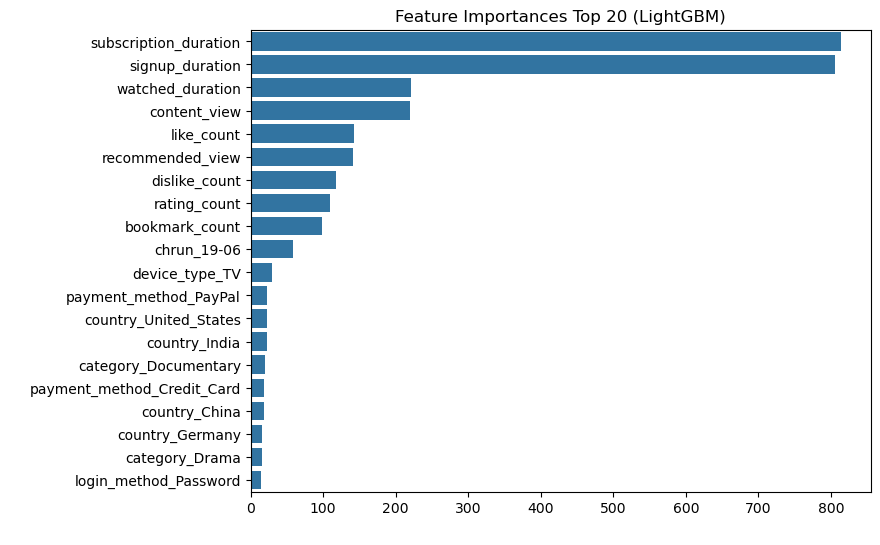

In [22]:
plt.figure(figsize=(8, 6))
plt.title('Feature Importances Top 20 (LightGBM)')
sns.barplot(x=lgbm_imp_top20 , y = lgbm_imp_top20.index)
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

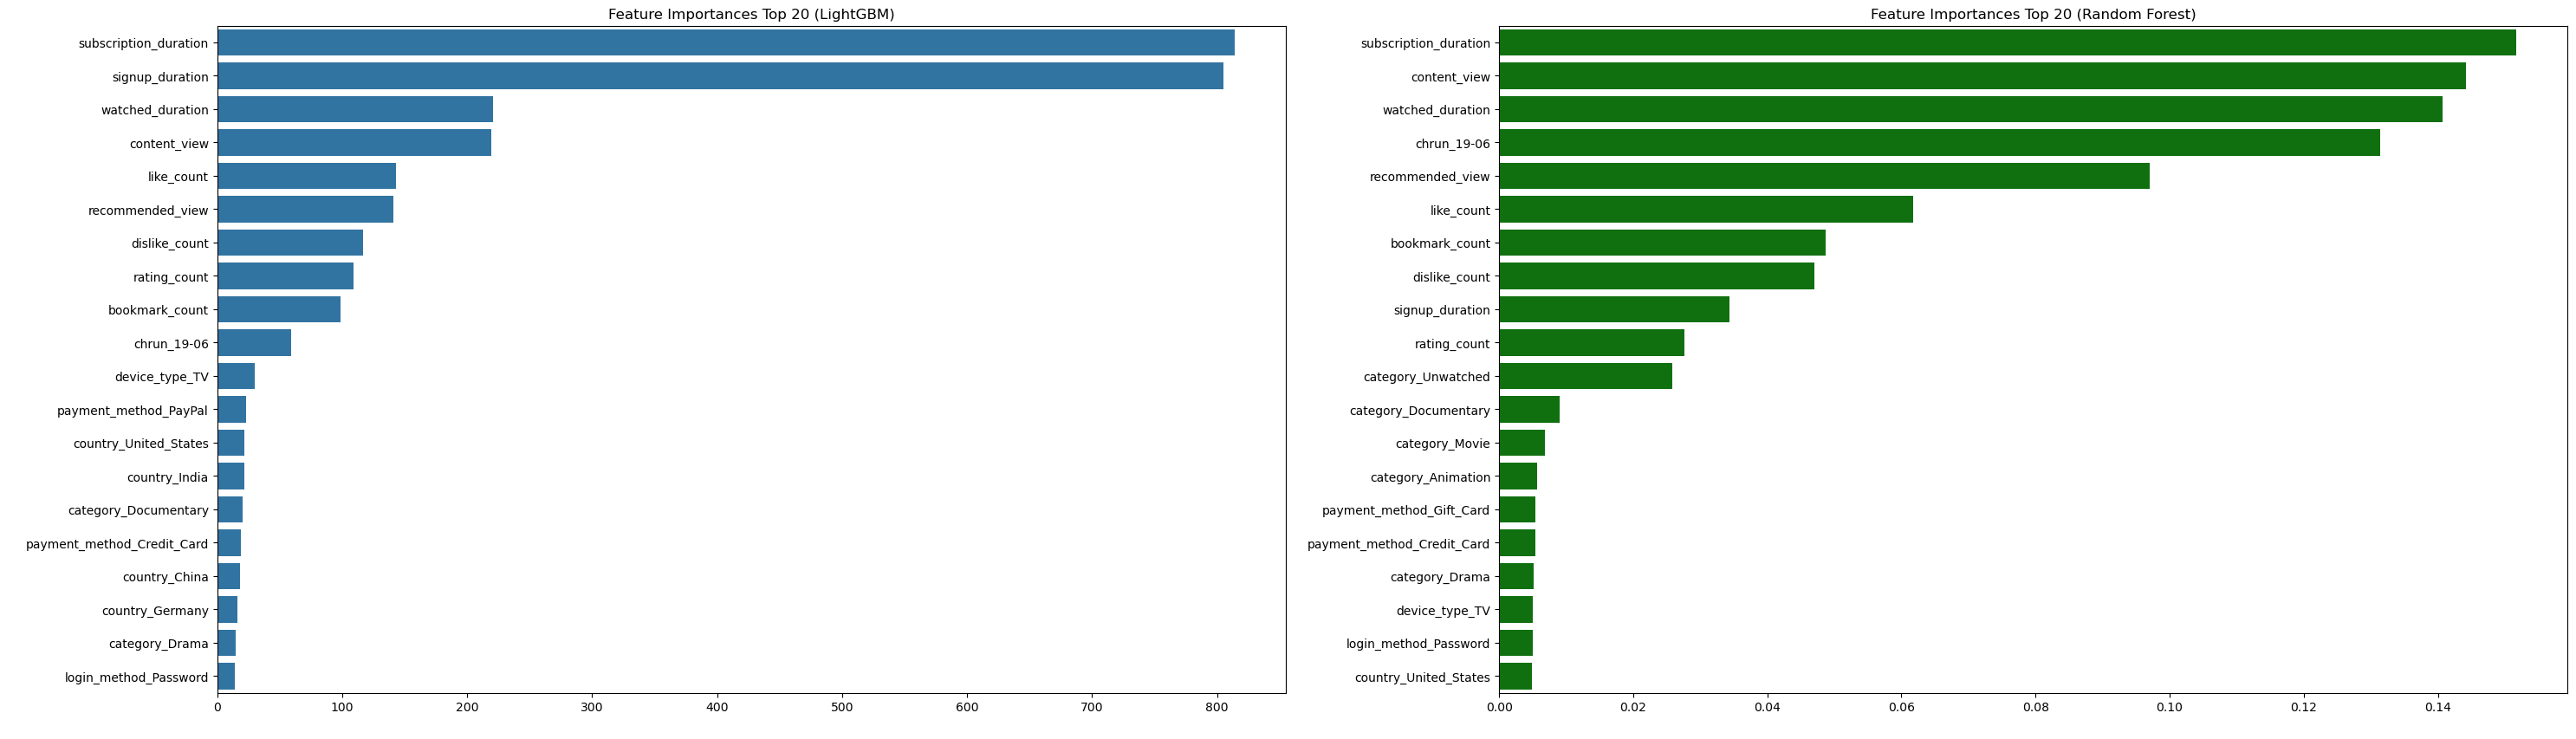

In [23]:
plt.figure(figsize=(35,10))
plt.subplot(1,2,1)
plt.title('Feature Importances Top 20 (LightGBM)')
sns.barplot(x=lgbm_imp_top20 , y = lgbm_imp_top20.index)
plt.xlabel(' ')
plt.ylabel(' ')

plt.subplot(1,2,2)
plt.title('Feature Importances Top 20 (Random Forest)')
sns.barplot(x=rf_imp_top20 , y = rf_imp_top20.index, color='g')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

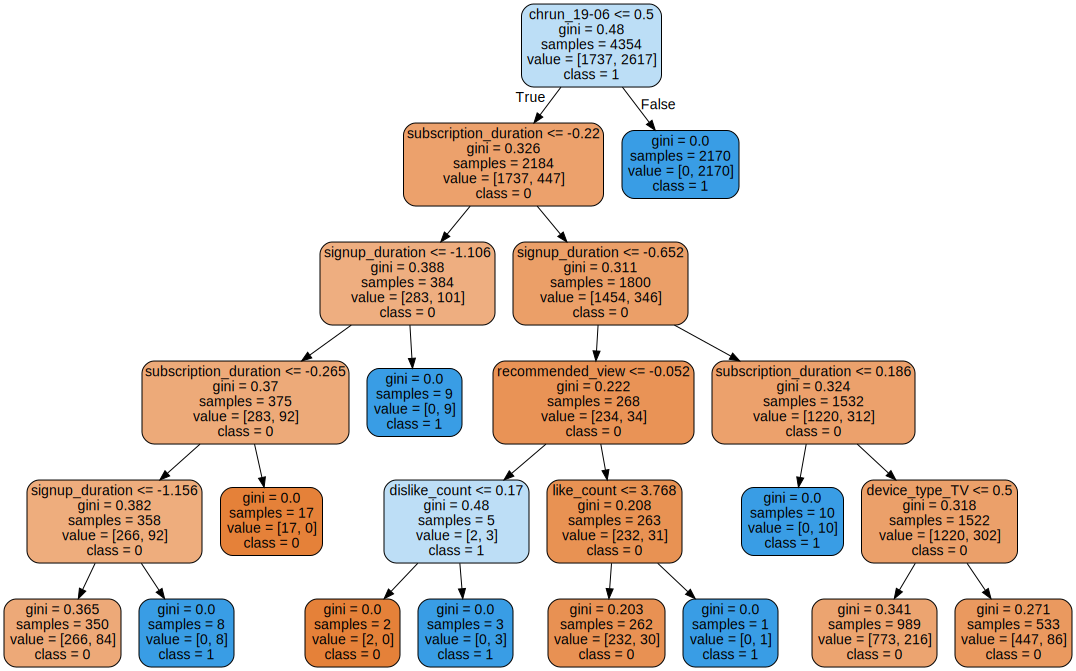

In [24]:
dt_clf = DecisionTreeClassifier(random_state=1, max_depth=5)
dt_clf.fit(X_train_scaled, y_train)

Source(export_graphviz(dt_clf, feature_names=X.columns, class_names=['0','1'], rounded = True, filled = True)) 

- 현재 이탈을 결정짓는 핵심 요인은 구독 기간, 가입 기간, 콘텐츠 시청 기간, 시청 콘텐츠 수, 19년도 6월 이탈 여부이다. 
- 구독 기간과 가입 기간이 이탈과 관련이 높으나, 장기 고객이 아닌 신규 고객의 리텐션을 확보하기 어렵다. 
- 그래서, 구독 기간과 관련된 요인을 제거하고 다시 모델링을 진행할 것이다.

### 모델링 수정 - 기간 관련 속성 제거

In [25]:
X_rvs = X.drop(['signup_duration','subscription_duration','chrun_19-06'], axis=1)
X_rvs.shape

(5443, 26)

In [26]:
X_train_rvs, X_test_rvs, y_train_rvs, y_test_rvs = train_test_split(X_rvs,y,test_size=0.2,random_state=1,stratify=y)

In [27]:
columns_rvs = ['content_view', 'recommended_view', 'watched_duration', 'bookmark_count', 'like_count', 'dislike_count', 'rating_count']

X_train_rvs_scaled = X_train_rvs.copy()
X_train_rvs_scaled[columns_rvs] = scaler.fit_transform(X_train_rvs[columns_rvs])

X_test_rvs_scaled = X_test_rvs.copy()
X_test_rvs_scaled[columns_rvs] = scaler.transform(X_test_rvs[columns_rvs])

print(X_train_rvs_scaled.shape)
print(X_test_rvs_scaled.shape)

(4354, 26)
(1089, 26)


In [28]:
# Decision Tree
dt_clf_rvs = DecisionTreeClassifier(random_state=1)
dt_clf_rvs.fit(X_train_rvs_scaled, y_train)

dt_pred_train_rvs = dt_clf_rvs.predict(X_train_rvs_scaled)
dt_pred_test_rvs = dt_clf_rvs.predict(X_test_rvs_scaled)

print_clf_eval(y_test, dt_pred_test_rvs)

confusion matrix
[[322 112]
 [ 80 575]]
-----------------------------------------------
정확도: 0.8237. 재현율: 0.8779, 정밀도: 0.8370
F1-Score: 0.8569. AUC: 0.8099


In [29]:
# Ensembel-LightGBM(Boosting) 
lgbm_clf_rvs = LGBMClassifier(random_state=1)
lgbm_clf_rvs.fit(X_train_rvs_scaled, y_train)

lgbm_pred_train_rvs = lgbm_clf_rvs.predict(X_train_rvs_scaled)
lgbm_pred_test_rvs = lgbm_clf_rvs.predict(X_test_rvs_scaled)

print()
print_clf_eval(y_test, lgbm_pred_test_rvs)

[LightGBM] [Info] Number of positive: 2617, number of negative: 1737
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 550
[LightGBM] [Info] Number of data points in the train set: 4354, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.601056 -> initscore=0.409869
[LightGBM] [Info] Start training from score 0.409869

confusion matrix
[[414  20]
 [106 549]]
-----------------------------------------------
정확도: 0.8843. 재현율: 0.8382, 정밀도: 0.9649
F1-Score: 0.8971. AUC: 0.8960


In [30]:
params = {'n_estimators':[100,150,200],
        'max_depth':[3,6,9], 
        'min_child_samples':[3,6,9],
        'num_leaves':[6,12,18]} 

grid_cv = GridSearchCV(lgbm_clf_rvs, param_grid=params , cv=5, n_jobs=-1)
grid_cv.fit(X_train_rvs_scaled, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

[LightGBM] [Info] Number of positive: 2617, number of negative: 1737
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 550
[LightGBM] [Info] Number of data points in the train set: 4354, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.601056 -> initscore=0.409869
[LightGBM] [Info] Start training from score 0.409869
최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_child_samples': 3, 'n_estimators': 100, 'num_leaves': 6}
최고 예측 정확도: 0.8884


In [31]:
lgbm_clf_fn = LGBMClassifier(max_depth=6, min_child_samples=3, n_estimators=100, num_leaves=6, random_state=1)
lgbm_clf_fn.fit(X_train_rvs_scaled, y_train)

lgbm_pred_train_fn = lgbm_clf_fn.predict(X_train_rvs_scaled)
lgbm_pred_test_fn = lgbm_clf_fn.predict(X_test_rvs_scaled)

print()
print_clf_eval(y_test, lgbm_pred_test_fn)

[LightGBM] [Info] Number of positive: 2617, number of negative: 1737
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 550
[LightGBM] [Info] Number of data points in the train set: 4354, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.601056 -> initscore=0.409869
[LightGBM] [Info] Start training from score 0.409869

confusion matrix
[[430   4]
 [109 546]]
-----------------------------------------------
정확도: 0.8962. 재현율: 0.8336, 정밀도: 0.9927
F1-Score: 0.9062. AUC: 0.9122


### 이탈 요인 재분석

In [32]:
lgbm_imp_values_rvs = lgbm_clf_fn.feature_importances_ 
lgbm_imp_rvs = pd.Series(lgbm_imp_values_rvs, index=X_rvs.columns)
lgbm_imp_top20_rvs = lgbm_imp_rvs.sort_values(ascending=False)[:20]

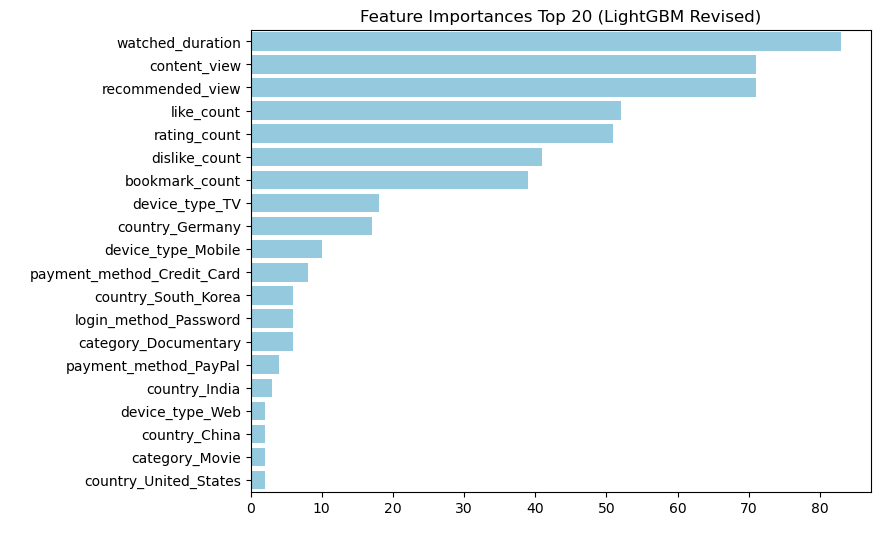

In [33]:
plt.figure(figsize=(8, 6))
plt.title('Feature Importances Top 20 (LightGBM Revised)')
sns.barplot(x=lgbm_imp_top20_rvs, y = lgbm_imp_top20_rvs.index, color='skyblue')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

- 해당 그래프는 구독 서비스에 영향을 미치는 요인이 서비스의 이용 요소와 관련됨을 보여준다.
- 컨텐츠 시청 시간, 컨텐츠 시청 수, 추천 컨텐츠 시청 수는 상위 3위 속성으로 서비스의 이용과 직접적인 관련이 있다.
- 좋아요 개수, 평가 개수, 싫어요 개수, 북마크 개수는 상호작용 관련 속성으로 서비스의 이용과 간접적인 관련이 있다.

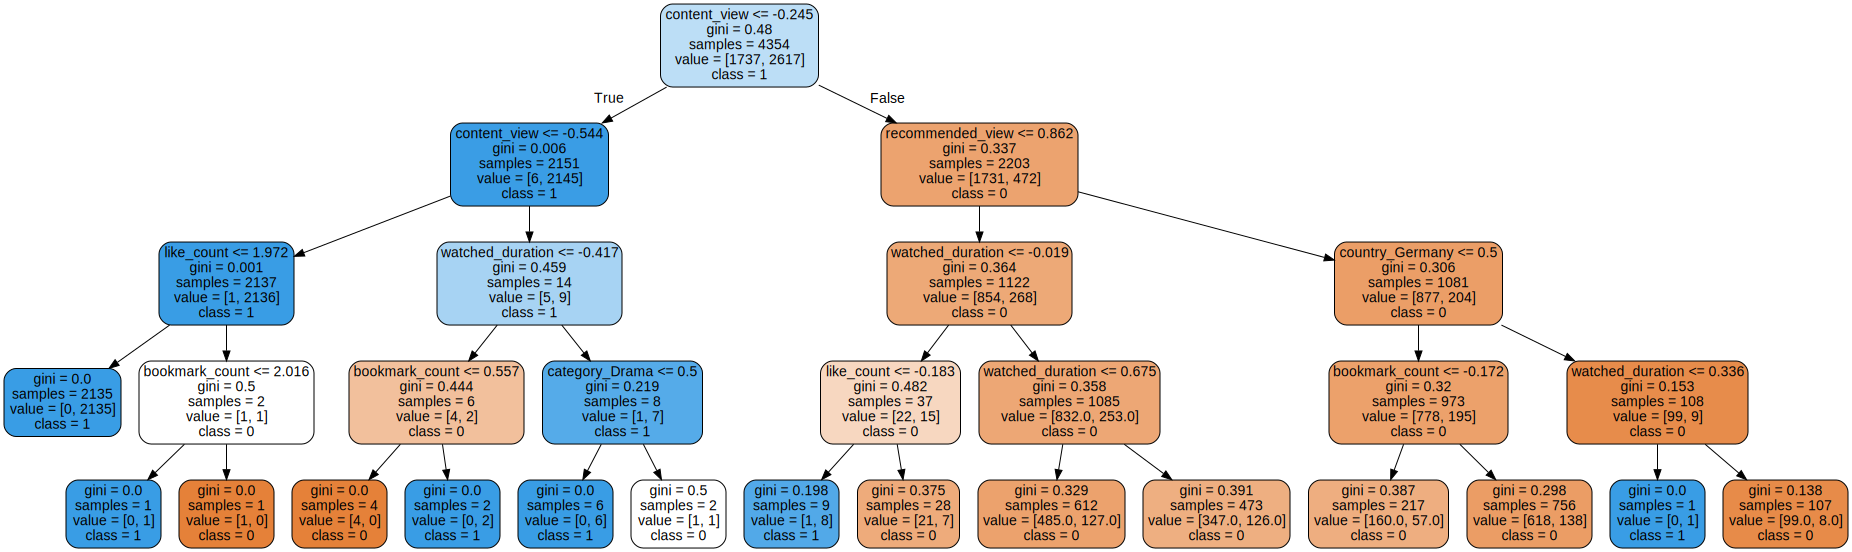

In [34]:
dt_clf_rvs = DecisionTreeClassifier(random_state=1, max_depth=4)
dt_clf_rvs.fit(X_train_rvs_scaled, y_train)

Source(export_graphviz(dt_clf_rvs, feature_names=X_rvs.columns, class_names=['0','1'], rounded = True, filled = True)) 

- 의사결정나무로 보더라도, 구독 서비스에 영향을 미치는 요인은 서비스 이용 요소와 관련이 있다.
- 컨텐츠를 얼마나 시청했는지에 따라 이탈 여부가 분리되는 것을 보면, 유저의 구독 여부는 컨텐츠의 시청에 따라 달라짐을 확인할 수 있다.

In [96]:
q1= df.groupby(by=['churn'])[['signup_duration', 'subscription_duration', 'content_view', 
                                      'recommended_view', 'watched_duration', 'bookmark_count', 
                                      'like_count', 'dislike_count', 'rating_count']].quantile(0.25).round(2).T

q2= df.groupby(by=['churn'])[['signup_duration', 'subscription_duration', 'content_view', 
                                      'recommended_view', 'watched_duration', 'bookmark_count', 
                                      'like_count', 'dislike_count', 'rating_count']].quantile(0.5).round(2).T

mean = df.groupby(by=['churn'])[['signup_duration', 'subscription_duration', 'content_view', 
                                        'recommended_view', 'watched_duration', 'bookmark_count', 
                                        'like_count', 'dislike_count', 'rating_count']].mean().round(2).T

summary = pd.concat([mean, q1, q2], axis=1, keys=['Mean', '25%', '50%'])
summary

Mean           25%           50%      
churn                     0.0    1.0    0.0   1.0     0.0   1.0
signup_duration         35.70  35.17  19.00  18.0   36.00  35.0
subscription_duration   35.70   6.58  19.00   1.0   36.00   1.0
content_view           110.22  19.23  90.00   0.0  109.00   0.0
recommended_view        22.10   3.80  17.00   0.0   22.00   0.0
watched_duration       114.76  19.99  93.48   0.0  113.83   0.0
bookmark_count           3.86   0.73   2.00   0.0    4.00   0.0
like_count               3.95   0.72   2.00   0.0    4.00   0.0
dislike_count            3.95   0.75   2.00   0.0    4.00   0.0
rating_count             3.95   0.75   2.00   0.0    4.00   0.0

- 미이탈 고객의 25%는 19개월 동안 90개의 컨텐츠를 시청한다 (93시간)
- 이것은 1달에 보통 4~5개의 컨텐츠를 시청한다는 것을 의미한다
- 그러므로, 고객 리텐션을 강화하기 위해서는 최소 1시간 단위의 컨텐츠를 주에 하나씩 보게끔 유도해야 한다

### 군집 분석
- LightGBM Feature importance를 기준으로 군집을 시도했으나, 이탈 여부를 완전히 구분하지 못하고, 군집 간 차이가 명확하게 나타지 않아 미사용

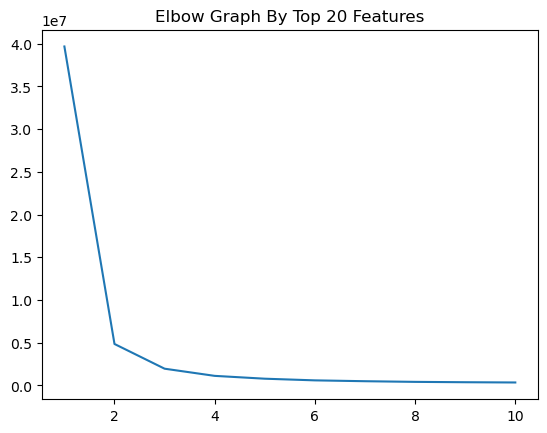

In [ ]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=1)
    wcss.append(km.fit(X_rvs[lgbm_imp_rvs.index]).inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Graph By Top 20 Features')
plt.show()

In [ ]:
km3 = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=1)
label = km3.fit_predict(X_rvs[lgbm_imp_rvs.index])

In [ ]:
pca = PCA(n_components=2)
transformed = pca.fit_transform(X_rvs[lgbm_imp_rvs.index])
pca_df = pd.DataFrame(data=pca.components_.T, index=X_rvs.columns, columns=['ftr1','ftr2'])

In [ ]:
pca_df['ftr1'].sort_values(ascending=False)

watched_duration              0.714622
content_view                  0.684648
recommended_view              0.136712
dislike_count                 0.021817
like_count                    0.021520
rating_count                  0.021512
bookmark_count                0.021028
category_Documentary          0.002428
category_Movie                0.001112
category_Animation            0.001034
category_Drama                0.000879
login_method_Social_Login     0.000203
payment_method_Gift_Card      0.000150
device_type_Mobile            0.000125
country_China                 0.000056
country_India                 0.000025
country_Germany              -0.000003
country_Japan                -0.000004
device_type_TV               -0.000030
country_United_States        -0.000036
country_South_Korea          -0.000039
payment_method_PayPal        -0.000063
payment_method_Credit_Card   -0.000087
device_type_Web              -0.000095
login_method_Password        -0.000203
category_Unwatched       

In [ ]:
pca_df['ftr2'].sort_values(ascending=False)

watched_duration              0.084551
recommended_view              0.045685
category_Unwatched            0.023015
device_type_Web               0.002370
country_India                 0.002301
login_method_Social_Login     0.002118
payment_method_Gift_Card      0.001525
country_Japan                 0.001070
country_Germany               0.000575
device_type_TV                0.000329
country_South_Korea          -0.000283
payment_method_PayPal        -0.000728
payment_method_Credit_Card   -0.000797
country_China                -0.001694
country_United_States        -0.001968
login_method_Password        -0.002118
device_type_Mobile           -0.002699
category_Drama               -0.003485
category_Movie               -0.003747
category_Animation           -0.005176
category_Documentary         -0.010607
content_view                 -0.034770
bookmark_count               -0.484841
dislike_count                -0.498734
like_count                   -0.500782
rating_count             

In [ ]:
df['ftr1'] = transformed[:,0]
df['ftr2'] = transformed[:,1]
df['label'] = label

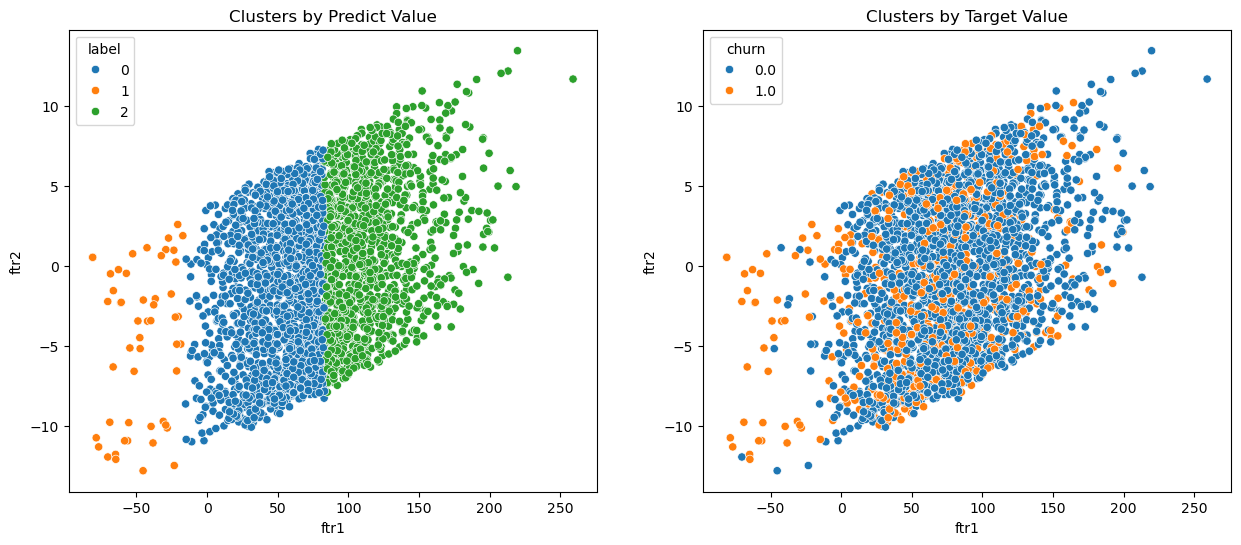

label  churn
0      0.0      1165
       1.0       347
1      1.0      2693
       0.0        13
2      0.0       993
       1.0       232
Name: count, dtype: int64

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
sns.scatterplot(data=df, x='ftr1', y='ftr2', hue='label',palette=["#1f77b4", "#ff7f0e", "#2ca02c"])
plt.title('Clusters by Predict Value')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='ftr1', y='ftr2', hue='churn')
plt.title('Clusters by Target Value')
plt.show()

df.groupby(by=['label'])['churn'].value_counts()

- Feature Importance 값에 기반하여 군집을 형성하였을 때, 이탈 인원의 약 80%가 실제값과 맞게 잘 분류되었으나, 약 20%는 잘 구분하지 못하는 것으로 나타났다.
- 미이탈 인원 군집(0, 2)에서 전체 인원의 약 20%가 이탈 위험이 있는 것으로 나타났고, 군집을 나눈 기준은 컨텐츠 시청 횟수, 시간, 추천 컨텐츠 시청으로 확인된다.
- 미이탈 군집은 컨텐츠 시청 시간이 길어지더라도 이탈에 영향이 없음을 시사한다.

In [ ]:
df.groupby(by=['label'])[['signup_duration', 'subscription_duration','content_view', 'recommended_view', 'watched_duration',
                           'bookmark_count', 'like_count', 'dislike_count', 'rating_count','category_Animation', 'category_Documentary', 
                           'category_Drama', 'category_Movie']].mean().round(2)

,signup_duration,subscription_duration,content_view,recommended_view,watched_duration,bookmark_count,like_count,dislike_count,rating_count,category_Animation,category_Documentary,category_Drama,category_Movie
label,,,,,,,,,,,,,
0,35.88,34.51,89.89,17.94,93.03,3.87,3.90,3.97,3.98,0.19,0.45,0.19,0.18
1,34.76,1.11,0.45,0.09,0.46,0.07,0.06,0.05,0.07,0.00,0.01,0.00,0.00
2,36.13,35.79,134.76,26.97,140.94,3.87,3.98,4.00,3.94,0.19,0.45,0.15,0.21


In [ ]:
# 군집(0) 이탈/미이탈 비교
print(df[(df['label']==0)&(df['churn']==0)][['signup_duration', 'subscription_duration','content_view', 'recommended_view', 'watched_duration',
                                             'bookmark_count', 'like_count', 'dislike_count', 'rating_count','category_Animation', 
                                             'category_Documentary', 'category_Drama', 'category_Movie']].mean().round(2))
print()
print(df[(df['label']==0)&(df['churn']==1)][['signup_duration', 'subscription_duration','content_view', 'recommended_view', 'watched_duration',
                                             'bookmark_count', 'like_count', 'dislike_count', 'rating_count','category_Animation', 
                                             'category_Documentary', 'category_Drama', 'category_Movie']].mean().round(2))

signup_duration          35.67
subscription_duration    35.67
content_view             90.00
recommended_view         17.99
watched_duration         93.12
bookmark_count            3.81
like_count                3.88
dislike_count             3.94
rating_count              3.96
category_Animation        0.18
category_Documentary      0.45
category_Drama            0.19
category_Movie            0.18
dtype: float64

signup_duration          36.59
subscription_duration    30.59
content_view             89.52
recommended_view         17.77
watched_duration         92.71
bookmark_count            4.05
like_count                3.94
dislike_count             4.07
rating_count              4.04
category_Animation        0.21
category_Documentary      0.44
category_Drama            0.17
category_Movie            0.18
dtype: float64


In [ ]:
# 군집(2) 이탈/미이탈 비교
print(df[(df['label']==2)&(df['churn']==0)][['signup_duration', 'subscription_duration','content_view', 'recommended_view', 'watched_duration',
                                             'bookmark_count', 'like_count', 'dislike_count', 'rating_count','category_Animation', 
                                             'category_Documentary', 'category_Drama', 'category_Movie']].mean().round(2))
print()
print(df[(df['label']==2)&(df['churn']==1)][['signup_duration', 'subscription_duration','content_view', 'recommended_view', 'watched_duration',
                                             'bookmark_count', 'like_count', 'dislike_count', 'rating_count','category_Animation', 
                                             'category_Documentary', 'category_Drama', 'category_Movie']].mean().round(2))

signup_duration           35.92
subscription_duration     35.92
content_view             134.95
recommended_view          27.12
watched_duration         141.22
bookmark_count             3.92
like_count                 4.03
dislike_count              3.98
rating_count               3.92
category_Animation         0.19
category_Documentary       0.44
category_Drama             0.15
category_Movie             0.22
dtype: float64

signup_duration           37.02
subscription_duration     35.23
content_view             133.96
recommended_view          26.30
watched_duration         139.77
bookmark_count             3.62
like_count                 3.74
dislike_count              4.06
rating_count               4.01
category_Animation         0.17
category_Documentary       0.49
category_Drama             0.15
category_Movie             0.19
dtype: float64
